Text(0.5, 1.0, 'Training set')

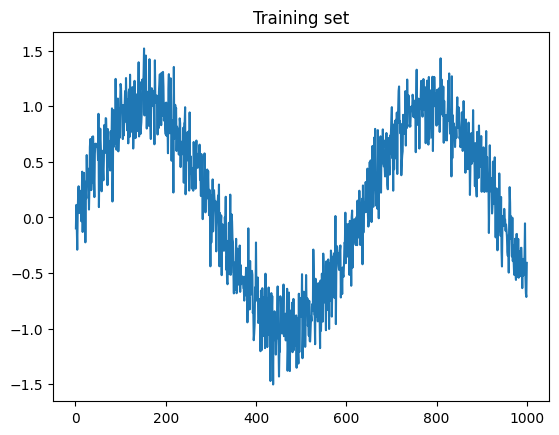

In [1]:
from lbm.datasets.noisy_sine import Prepocessor
from matplotlib import pyplot as plt

processor = Prepocessor()
train_loader, val_loader, test_loader = processor.get_loaders()

plt.plot(processor.train_set.x.numpy(), processor.train_set.y.numpy())
plt.title('Training set')

In [2]:
from lbm.models import MultiInLinearNormalized
from lbm.workflow import train_and_validate
from torch.optim import Adam
from torch.nn import MSELoss

model = MultiInLinearNormalized(4)
optimizer = Adam(model.parameters())
loss_fn = MSELoss()

train_and_validate(model, train_loader, val_loader, optimizer, loss_fn, epochs=1000)

ImportError: cannot import name 'MultiInLinearNormalized' from 'lbm.models.multi_in_linear' (/Users/jamescataldo/Code/letsbuildmodels/lbm/models/multi_in_linear.py)